In [2]:
import lumicks.pylake as pylake
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Loading files
First we need to import the data files exported from Bluelake, in this case we are going import and visualize few images previously recorded.

In [3]:
file1 = pylake.File(r"/mnt/d/ctrap/data/2019-06-04/20190604-175926 Kymograph DNA 7 (5) Sliding SWR1 1nM single molecule.h5")
file2 = pylake.File(r"/mnt/d/ctrap/data/2019-06-04/20190604-175947 Kymograph DNA 7 (4) sliding SWR1.h5")

# Inspect file content
To check the content of the file we can use the function 
```
print("file name")
``` 
to list all the items that are stored inside. In this case the file contains a single scan. 

In [4]:
print(file1)
print(file2)

File root metadata:
- Bluelake version: 1.5.5
- Description: 
- Experiment: 
- Export time (ns): 1559685566912522300
- File format version: 2
- GUID: {DF2C04AB-A73D-4D6B-B205-3ED7AE3388D3}

Bead diameter:
  Template 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 451
  Template 2:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 451
Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 451
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 451
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 451
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 451
Calibration:
  131:
    Force 1x
    Force 1y
    Force 2x
    Force 2y
    JSON:
    - Data type: object
    - Size: 1
Confocal diagnostics:
  Blue shutter:
  - Data type: uint8
  - Size: 2341717
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Si

# Visualize images

We can now load the scan item and display it. We can plot original image alongside the three separate red,green,blue channels 

In [5]:
scan1 = file1.scans["7"]

KeyError: '7'

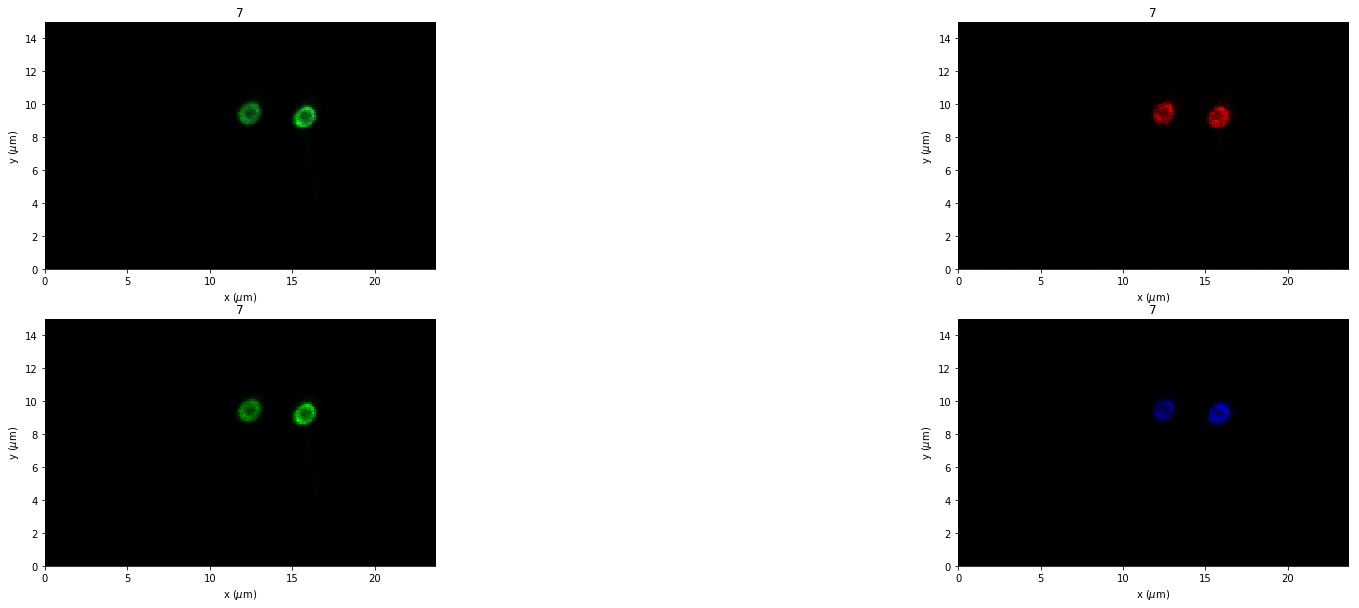

In [5]:
plt.figure(figsize=(30,10))
plt.subplot(221)
scan1.plot_rgb()
plt.subplot(222)
scan1.plot_red()
plt.subplot(223)
scan1.plot_green()
plt.subplot(224)
scan1.plot_blue()

We can also access the underlying raw image data and plot the profile for a single line of the scan

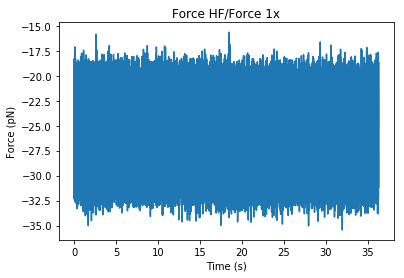

In [6]:
file1.force1x.plot()

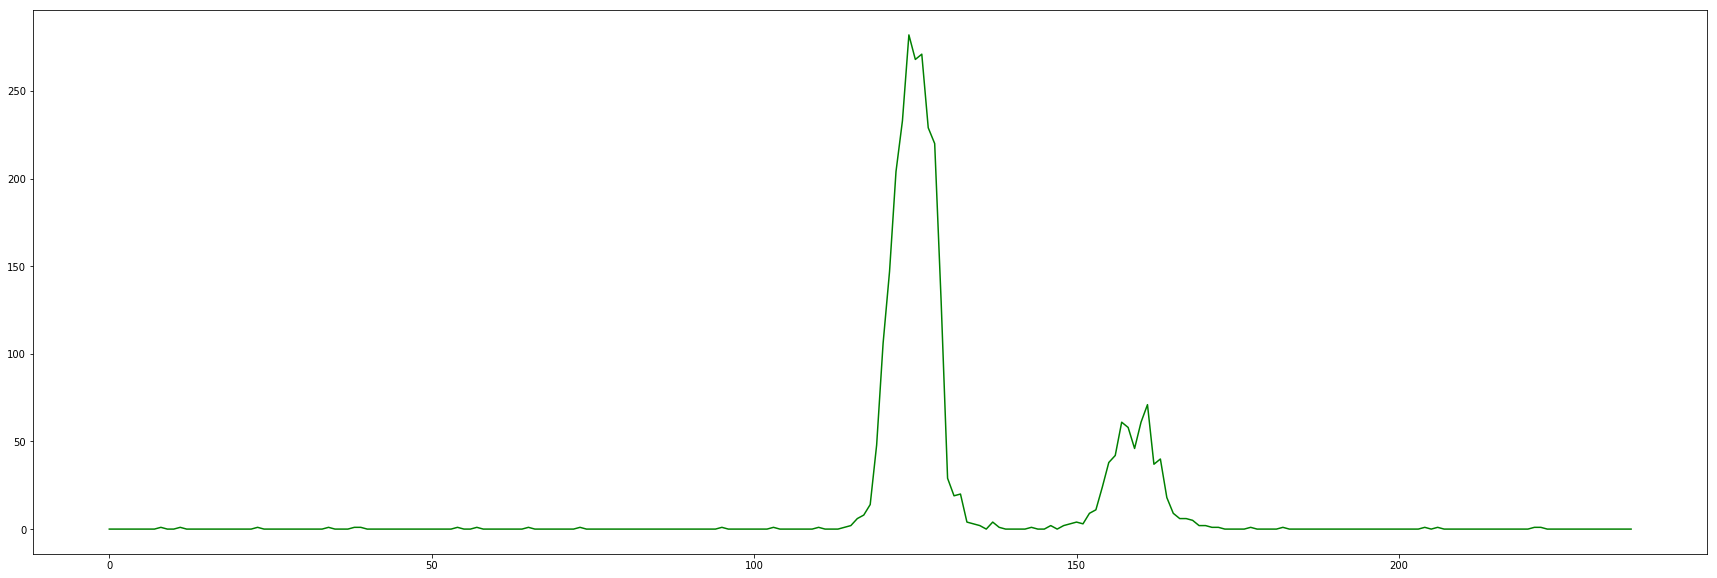

In [15]:
green_img = scan1.green_image
plt.figure(figsize=(30,10))
line = 50
plt.plot(green_img[line,:], 'g');

# Kymographs

We can also access kymograph items and visualize them alongside the time-correlated force trace

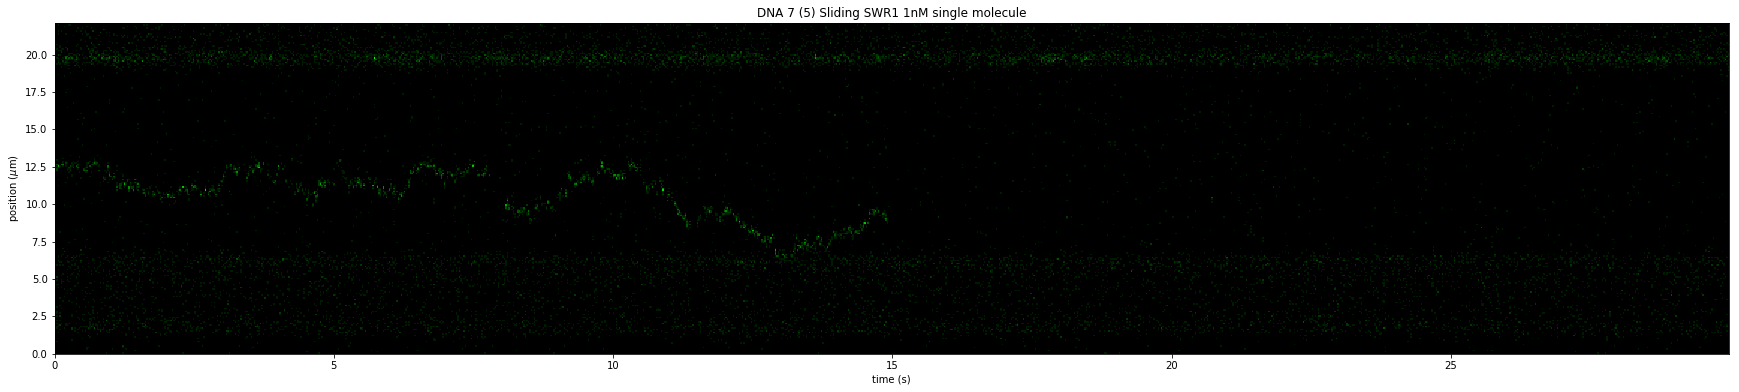

In [10]:
kymos = list(file1.kymos)
kymo1 = file1.kymos[kymos[0]]
ax = plt.figure(figsize=(30,20))
kymo1.plot_green()
axes = plt.gca()
xmin, xmax = axes.get_xlim()

<Figure size 432x288 with 0 Axes>

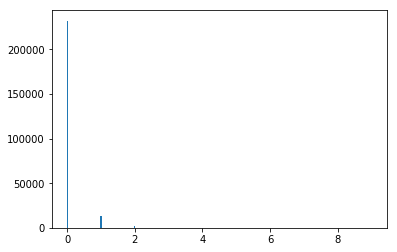

<Figure size 432x288 with 0 Axes>

In [11]:
# Access the raw image data
green = kymo1.green_image
plt.hist(green.ravel(), bins=256)
plt.figure()

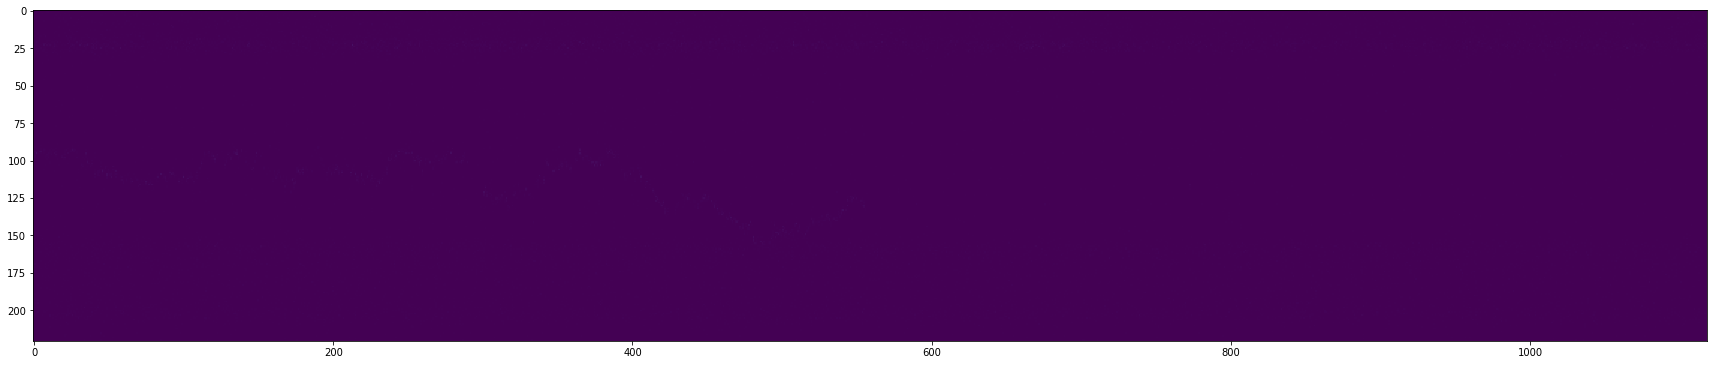

In [12]:
RawLineKymo = plt.figure(figsize=(30,20))
RawLineKymo = plt.imshow(green,clim=(0.0, 200))

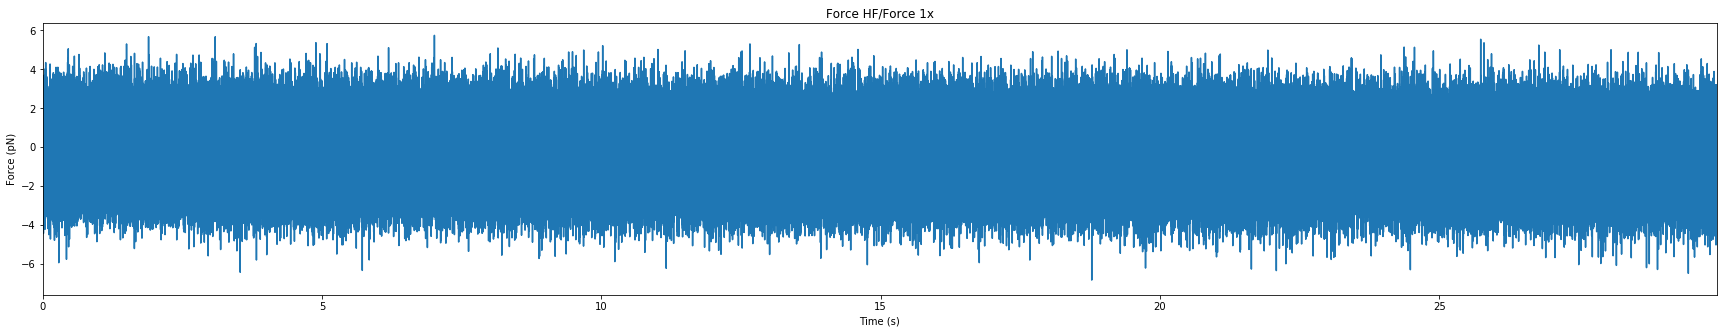

In [13]:
plt.figure(figsize=(30,5))
plt.xlim(xmin,xmax)
file2.force1x.plot()

Also for kymograph we can plot the profile for a single line.

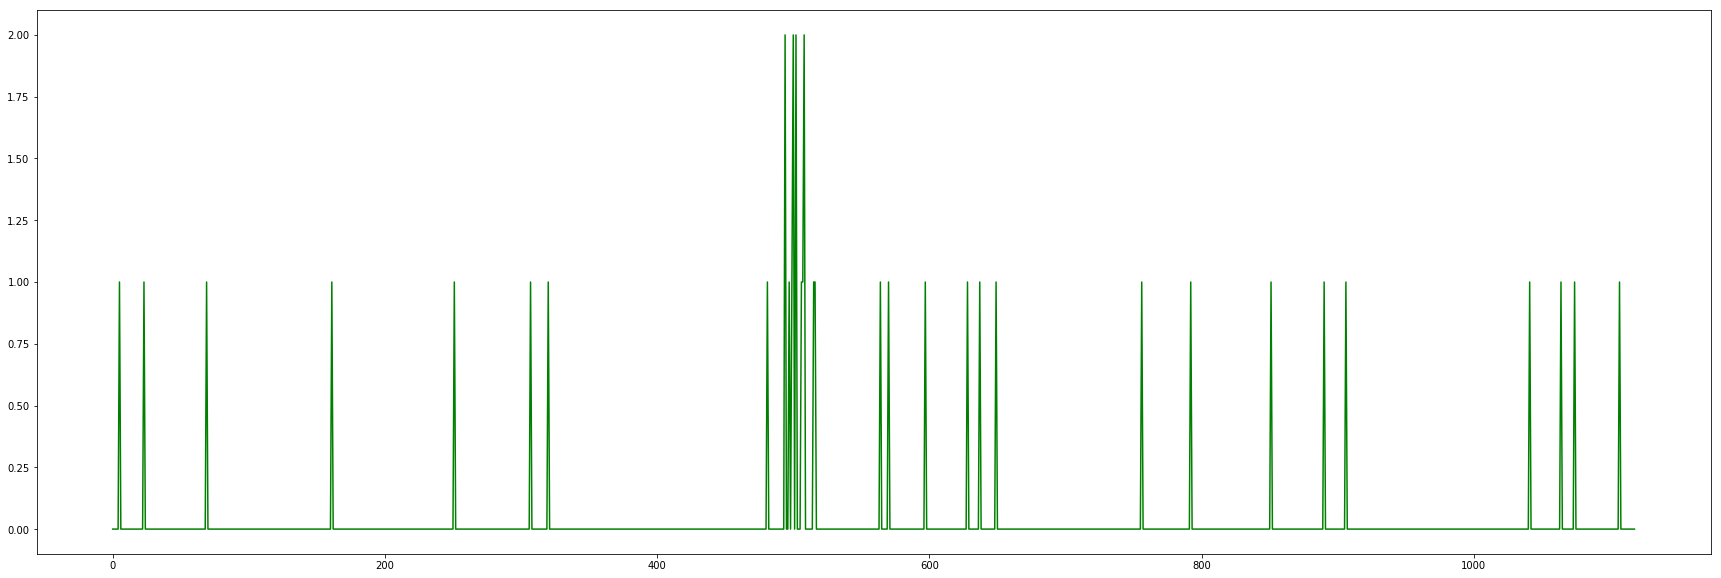

In [14]:
green_img = kymo1.green_image
plt.figure(figsize=(30,10))
line = 150
plt.plot(green_img[line,:], 'g');

# Export images

We can also save the images in tiff format to be processed with other tools (e.g. ImageJ) 

In [15]:
kymo1.save_tiff("kymo1.tiff")

In [36]:
scan1.save_tiff("scan1.tiff")